## Parcial Final

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import pandas as pd
import scipy.optimize as spo

## Teórico:

Partiendo de las siguientes premisas:
    
$$
\sum \vec F =m(\vec c +2 \vec w \times \vec v)\\
\vec w=[-wcos\lambda,0,wsin\lambda]\\
\vec r= [rcos\theta,rsin\theta,r]
$$

Y de que $wr=v$. Podemos obtener el vector de velocidad a partir de:


$$
\begin{equation}
\begin{split}
\vec v&=\vec w\times \vec r \\
&=\begin{pmatrix}
-wrsin\theta sin\lambda\\
wrcos\lambda\\
-wrcos\lambda sin\theta
\end{pmatrix}
\end{split}
\end{equation}
$$


De modo que se puede plantear la siguiente ecuación:

$$\begin{equation}
\begin{split}
-m\begin{pmatrix}
0\\
0\\
g
\end{pmatrix}
&= 
m\Big(\begin{pmatrix}
\ddot{x}\\
\ddot{y}\\
\ddot{z}
\end{pmatrix} + 2\begin{pmatrix}
-wcos\lambda\\
0\\
wsin\lambda
\end{pmatrix}\times \begin{pmatrix}
-wrsin\theta sin\lambda\\
wrcos\lambda\\
-wrcos\lambda sin\theta
\end{pmatrix}
\Big)\\
-\begin{pmatrix}
0\\
0\\
g
\end{pmatrix}&=\begin{pmatrix}
\ddot{x}\\
\ddot{y}\\
\ddot{z}
\end{pmatrix} +2\begin{pmatrix}
-w^2 r sin\lambda cos\lambda\\
w^2rsin^2\theta sen\theta + w^2rcos^2\lambda cos\theta\\
-w^2 r cos^2\lambda
\end{pmatrix}
\end{split}
\end{equation}
$$

De esta manera obtenemos el siguiente sistema de ecuaciones:

$$
\begin{equation}
\begin{split}
\ddot{x}&=2w^2rsin^2 \lambda cos \lambda \\
\ddot{y}&=-2w^2rcos^2\lambda sin\theta - 2w^2rsin\lambda sin\theta\\
\ddot{z}&=-g+2w^2rcos^2\lambda
\end{split}
\end{equation}
$$

Y teniendo en cuenta el vector de velocidad hallado previamente tenemos que:

$$
\begin{equation}
\begin{split}
\dot{x}&=wrsin\lambda sin\theta\\
\dot{y}&=wrcos\lambda\\
\dot{z}&=wrcos\lambda sin\theta
\end{split}
\end{equation}
$$

Por lo tanto, llegamos a:

$$
\begin{equation}
\begin{split}
\ddot{x}&=2wsin\lambda \dot{y}\\
\ddot{y}&=-2wcos\lambda \dot{x}-2wsin\lambda \dot{x}\\
\ddot{z}&=-g + 2wcos\lambda \dot{y}
\end{split}
\end{equation}
$$

## Parte 1

a, b)

In [149]:
datos=pd.read_csv('Datos.txt')
lam_30= datos[datos.angle==30]
lam_30

,h,angle,y,sigmay
20,10.0,30.0,0.0013,0.0015
21,20.0,30.0,0.0017,0.0015
22,30.0,30.0,0.0038,0.0015
23,40.0,30.0,0.0059,0.0015
24,50.0,30.0,0.0067,0.0015
25,60.0,30.0,0.0094,0.0015
26,70.0,30.0,0.0122,0.0015
27,80.0,30.0,0.0132,0.0015
28,90.0,30.0,0.0151,0.0015
29,100.0,30.0,0.0186,0.0015


c)

In [150]:
h_=sym.Symbol('h',real=True)
w_=sym.Symbol('w',real=True)
lamd=sym.Symbol('lambda',real=True)
g_=sym.Symbol('g',real=True)

def Coriolis_sym(h,w,lam,g):
    res=(2*(2**(1/2))/3) *w*sym.cos(lam)*((h**3)/g)**(1/2)
    return res

Coriolis_sym(h_,w_,lamd,g_)

0.942809041582063*w*(h**3/g)**0.5*cos(lambda)

In [151]:
def Coriolis_np(h,w,lam,g):
    ang=lam*2*np.pi/360
    res=(2*(2**(1/2))/3) *w*np.cos(ang)*((h**3)/g)**(1/2)
    return res

d)

In [152]:
def chi2(w,h,y,sigmay,angle,g):
    resp=np.sum((y-Coriolis_np(h,w,angle,g))**2 /(2*sigmay**2))
    return resp

e)

In [153]:
h=lam_30.h
y=lam_30.y
sigmay=lam_30.sigmay
angle=lam_30.angle
g=9.81

nll=lambda *w:chi2(*w)
p0=np.ones(1)


In [154]:
minimizar = spo.minimize( nll, p0, args=(h,y,sigmay,angle,g),options={'disp':True} )

bestparam=minimizar.x
bestparam


Optimization terminated successfully.
         Current function value: 1.145718
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4


array([7.24399804e-05])

f)

Text(0, 0.5, 'y[m]')

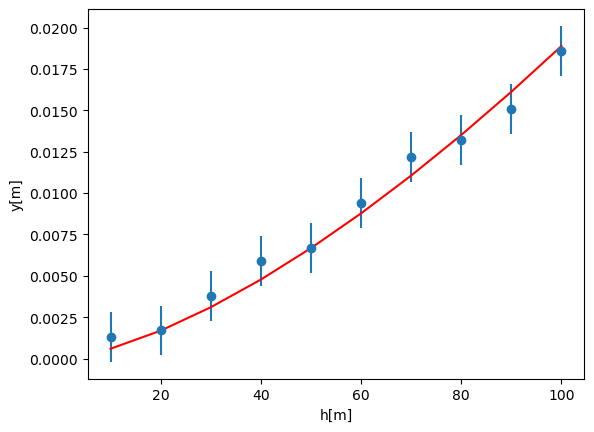

In [155]:
_x = np.linspace(np.min(h),np.max(h),10)
_y = Coriolis_np(_x,bestparam,angle,g)

plt.errorbar(h,y,yerr=sigmay,fmt='o')
plt.plot(_x,_y,color='r')
plt.xlabel('h[m]')
plt.ylabel('y[m]')

## Parte 2:
## Propagarción de la incertidumbre de la aceleración de la gravedad:

a, b, c, d, e)

In [156]:
N=300
Gravedad=[]
y_arr=np.array(y)
sigmay_arr=np.array(sigmay)
y_new=[]

for i in range(N):
    g_i= 9.81+np.random.normal(loc=0,scale=1)
    Gravedad.append(g_i)
    y_n=y_arr+np.random.normal(loc=0,scale=sigmay_arr[0],size=len(y_arr))
    y_new.append(y_n)
    

In [157]:
h_new = np.linspace(np.min(h),np.max(h),300)
nll2=lambda *w:chi2(*w)
optim = spo.minimize( nll, p0, args=(h_new,y_new,0.0015,30,Gravedad),options={'disp':True} )

    

ValueError: operands could not be broadcast together with shapes (300,10) (300,) 

f)

In [158]:
H2,binsx,binsy=np.histogram2d(Omega,Gravedad,bins=(binsx,binsy))

NameError: name 'Omega' is not defined

g)

Las variables sí están correlacionadas ya que en la gráfica se percibe una pendiente positiva. De modo que esto implica la correlación entre las variables implicadas.

h)

In [ ]:
H1=np.sum(H2,axis=1)

i)